<a href="https://colab.research.google.com/github/jasanchez19/ML-Gradient-Descent-Training-and-Validation/blob/main/Homework2JorgeSanchezECGR4105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 2

In [83]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer
import seaborn as sns

Problem 1


In [84]:
url= "https://raw.githubusercontent.com/jasanchez19/ML-Gradient-Descent-Training-and-Validation/main/diabetes.csv"
#configure the data sets
df=pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [85]:
#set up varaibles
X = df.iloc[:, [0,1,2,3,4,5,6,7]].values
Y = df.iloc[:, 8].values
#standardize data from x variable
scaler = StandardScaler()
X = scaler.fit_transform(X)
#split the dataset
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, train_size = 0.8, test_size = 0.2)

In [86]:
#do logistic regression from built in functions
classifier = LogisticRegression(random_state = 0)
classifier.fit(xTrain, yTrain)

LogisticRegression(random_state=0)

In [87]:
#run the prediction function
yPred = classifier.predict(xTest)

#get the values from the confusion matrix
cmatrix = confusion_matrix(yTest, yPred)

#print accuracy, precision and recall results
print("Accuracy =",metrics.accuracy_score(yTest, yPred)) 
print("Precision =",metrics.precision_score(yTest, yPred)) 
print("Recall = ",metrics.recall_score(yTest, yPred))

Accuracy = 0.7597402597402597
Precision = 0.5555555555555556
Recall =  0.5952380952380952


Text(0.5, 257.44, 'Predicted')

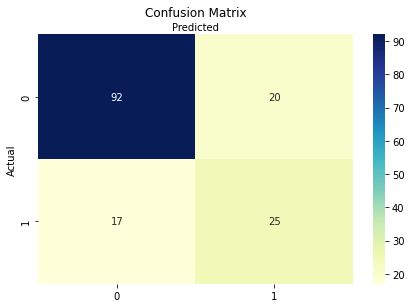

In [88]:
#plot confusion matrix that represents the binary classifier
class_names=[0,1]
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(cmatrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion Matrix', y=1) 
plt.ylabel('Actual') 
plt.xlabel('Predicted')

Problem 2

In [89]:
#set up varaibles
X = df.iloc[:, [0,1,2,3,4,5,6,7]].values
Y = df.iloc[:, 8].values
#standardize data from x variable
scaler = StandardScaler()
X = scaler.fit_transform(X)
#split the dataset
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, train_size = 0.8, test_size = 0.2)

In [90]:
#do 5 kfolds
kfoldA = KFold(n_splits=5, random_state=0, shuffle=True)
classifier = LogisticRegression(solver='liblinear')
classifier.fit(xTrain, yTrain)
results = cross_val_score(classifier, X, Y, cv=kfoldA)
#print the mean and standard deviation across all folds to find accuracy
print("Accuracy = %.3f%% (%.3f%%)"  % (results.mean()*100.0, results.std()*100.0))

Accuracy = 77.600% (2.777%)


Problem 3

In [91]:
#load breast cancer dataset
breast = load_breast_cancer() 
breast_data = breast.data 
breast_input = pd.DataFrame(breast_data)

X = breast_data
Y = breast.target

In [92]:
#standardize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

#split data
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, train_size = 0.8, test_size = 0.2)

#perform logistic regression with built in functions
classifier = LogisticRegression(random_state = 0)
classifier.fit(xTrain, yTrain)

LogisticRegression(random_state=0)

In [93]:
#do prediction function
yPred = classifier.predict(xTest)

#get values from confusion matrix
cmatrix = confusion_matrix(yTest, yPred)
cmatrix

array([[32,  3],
       [ 0, 79]])

In [94]:
#get results of training
print("Accuracy =",metrics.accuracy_score(yTest, yPred)) 
print("Precision =",metrics.precision_score(yTest, yPred)) 
print("Recall = ",metrics.recall_score(yTest, yPred))

Accuracy = 0.9736842105263158
Precision = 0.9634146341463414
Recall =  1.0


Text(0.5, 257.44, 'Predicted')

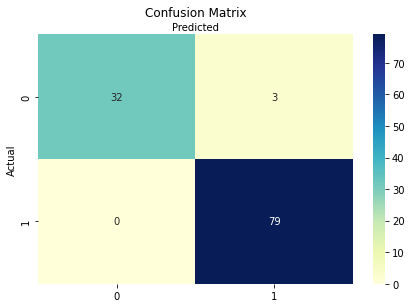

In [95]:
#plot confusion matrix
class_names=[0,1]
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(cmatrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion Matrix', y=1) 
plt.ylabel('Actual') 
plt.xlabel('Predicted')

In [96]:
#add weight penalty to data
X = breast_data
Y = breast.target

#standardize data 
scaler = StandardScaler()
X = scaler.fit_transform(X)

#split data
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, train_size = 0.8, test_size = 0.2)

In [97]:
#do logistic regression with weight penalty
classifier = LogisticRegression(random_state = 0, penalty="l2", solver="newton-cg", class_weight='balanced')
classifier.fit(xTrain, yTrain)

#prediction function
yPred = classifier.predict(xTest)

#get confusion matrix
cmatrix = confusion_matrix(yTest, yPred)
cmatrix

array([[39,  1],
       [ 2, 72]])

In [98]:
#get results
print("Accuracy =",metrics.accuracy_score(yTest, yPred)) 
print("Precision =",metrics.precision_score(yTest, yPred)) 
print("Recall = ",metrics.recall_score(yTest, yPred))

Accuracy = 0.9736842105263158
Precision = 0.9863013698630136
Recall =  0.972972972972973


Problem 4

In [99]:
#get data
X = breast_data
Y = breast.target

#standardize data 
scaler = StandardScaler()
X = scaler.fit_transform(X)

#split data
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, train_size = 0.8, test_size = 0.2)

In [100]:
#do 5 kfolds
kfoldA = KFold(n_splits=5, random_state=0, shuffle=True)
classifier = LogisticRegression(solver='liblinear')
classifier.fit(xTrain, yTrain)
results = cross_val_score(classifier, X, Y, cv=kfoldA)
#print mean and standard deviation
print("Accuracy = %.3f%% (%.3f%%)"  % (results.mean()*100.0, results.std()*100.0))

Accuracy = 97.193% (1.701%)


In [101]:
#do 10 kfolds
kfoldB = KFold(n_splits=10, random_state=0, shuffle=True)
classifier = LogisticRegression(solver='liblinear')
classifier.fit(xTrain, yTrain)
results = cross_val_score(classifier, X, Y, cv=kfoldB)
#print mean and standard deviation
print("Accuracy = %.3f%% (%.3f%%)"  % (results.mean()*100.0, results.std()*100.0))

Accuracy = 97.895% (2.046%)


In [102]:
#add weight penalty to data
X = breast_data
Y = breast.target

#standardize data 
scaler = StandardScaler()
X = scaler.fit_transform(X)

#split data
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, train_size = 0.8, test_size = 0.2)

In [103]:
#do 5 kfolds
kfoldA = KFold(n_splits=5, random_state=0, shuffle=True)
classifier = LogisticRegression(penalty="l2", solver="newton-cg", class_weight='balanced')
classifier.fit(xTrain, yTrain)
results = cross_val_score(classifier, X, Y, cv=kfoldA)
#print mean and standard deviation
print("Accuracy = %.3f%% (%.3f%%)"  % (results.mean()*100.0, results.std()*100.0))

Accuracy = 97.016% (1.423%)


In [104]:
#do 10 kfolds
kfoldB = KFold(n_splits=10, random_state=0, shuffle=True)
classifier = LogisticRegression(penalty="l2", solver="newton-cg", class_weight='balanced')
classifier.fit(xTrain, yTrain)
results = cross_val_score(classifier, X, Y, cv=kfoldB)
#print mean and standard deviation
print("Accuracy = %.3f%% (%.3f%%)"  % (results.mean()*100.0, results.std()*100.0))

Accuracy = 97.190% (1.952%)
